# Why Should Errors in OLS Regression Be Normally Distributed?

In Ordinary Least Squares (OLS) regression, one of the key assumptions is that the errors (residuals) are normally distributed. This notebook explains why this assumption is important and how it affects the regression model.

---

## Introduction

In linear regression, we model the relationship between a dependent variable $y$ and one or more independent variables $X$ using the equation:

$$
y = X\beta + \varepsilon
$$

where:
- $y$ is the dependent variable (target),
- $X$ is the matrix of independent variables (features),
- $\beta$ is the vector of coefficients,
- $\varepsilon$ is the error term (residuals).

The OLS method estimates the coefficients $\beta$ by minimizing the sum of squared residuals:

$$
\min_{\beta} \sum_{i=1}^{n} (y_i - X_i \beta)^2
$$

For the OLS estimators to have desirable properties (such as being **unbiased** and **efficient**), the errors $\varepsilon$ must satisfy certain assumptions, one of which is **normality**.


## setup and imports

In [13]:
# @title setup and imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro
from math import sqrt as sq

## helper functions

In [ ]:
# @title helper functions

def plot_regression_results(x, y, y_pred, residuals, true_slope, true_intercept, noise_type='Exponential'):
    
    plt.figure(figsize=(12, 5))

    # Subplot 1: Scatter plot of data and fitted line
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='blue', label=f'Data with {noise_type} noise', alpha=0.5)
    plt.plot(x, y_pred, color='red', label=f'Fitted line (y = {model.coef_[0]:.2f}x + {model.intercept_:.2f})')
    plt.plot(x, true_slope * x + true_intercept, color='green', linestyle='--', label='True line')
    plt.title(f'Linear Regression with {noise_type} Noise')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    # Subplot 2: Histogram of residuals
    plt.subplot(1, 2, 2)
    plt.hist(residuals, bins=20, color='purple', alpha=0.7, density=True)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


def plot_linear_regression(x, y_normal, y_pred_normal, y_uniform, y_pred_uniform, true_slope, true_intercept, model_normal, model_uniform):
  
    plt.figure(figsize=(12, 5))

    # Subplot 1: Normal noise
    plt.subplot(1, 2, 1)
    plt.scatter(x, y_normal, color='blue', label='Data with normal noise', alpha=0.5)
    plt.plot(x, y_pred_normal, color='red', label=f'Fitted line (y = {model_normal.coef_[0]:.2f}x + {model_normal.intercept_:.2f})')
    plt.plot(x, true_slope * x + true_intercept, color='green', linestyle='--', label='True line')
    plt.title('Linear Regression with Normal Noise')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    # Subplot 2: Uniform noise
    plt.subplot(1, 2, 2)
    plt.scatter(x, y_uniform, color='blue', label='Data with uniform noise', alpha=0.5)
    plt.plot(x, y_pred_uniform, color='red', label=f'Fitted line (y = {model_uniform.coef_[0]:.2f}x + {model_uniform.intercept_:.2f})')
    plt.plot(x, true_slope * x + true_intercept, color='green', linestyle='--', label='True line')
    plt.title('Linear Regression with Uniform Noise')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [6]:
def perform_shapiro_wilk_test(residuals):
    """
    Perform the Shapiro-Wilk test for normality on the residuals and print the results.
    
    Parameters:
    residuals (array-like): The residuals to test for normality.
    """
    shapiro_stat, p_value = shapiro(residuals)
    
    print("Shapiro-Wilk Test Results:")
    print(f"Test Statistic: {shapiro_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("Result: Reject the null hypothesis (Residuals are not normally distributed)")
    else:
        print("Result: Fail to reject the null hypothesis (Residuals may be normally distributed)")


## Objective of This Notebook

In this Jupyter Notebook, our goal is simply to **visualize** the effect of non-normally distributed errors on regression plots.  
We will **not** conduct hypothesis tests, such as the F-test, to assess regression significance.

To observe how non-normality affects the plots, we assume that the error term $\varepsilon$ follows an **Exponential distribution**:

$$
\varepsilon_i \sim E(\lambda), \qquad \mathbb{E}(\varepsilon_i) = \frac{1}{\lambda} \qquad \text{Var}(\varepsilon_i) = \frac{1}{\lambda^2}
$$

where $\lambda$ is the rate parameter of the exponential distribution.


Shapiro-Wilk Test Results:
Test Statistic: 0.8371
P-value: 0.0000
Result: Reject the null hypothesis (Residuals are not normally distributed)


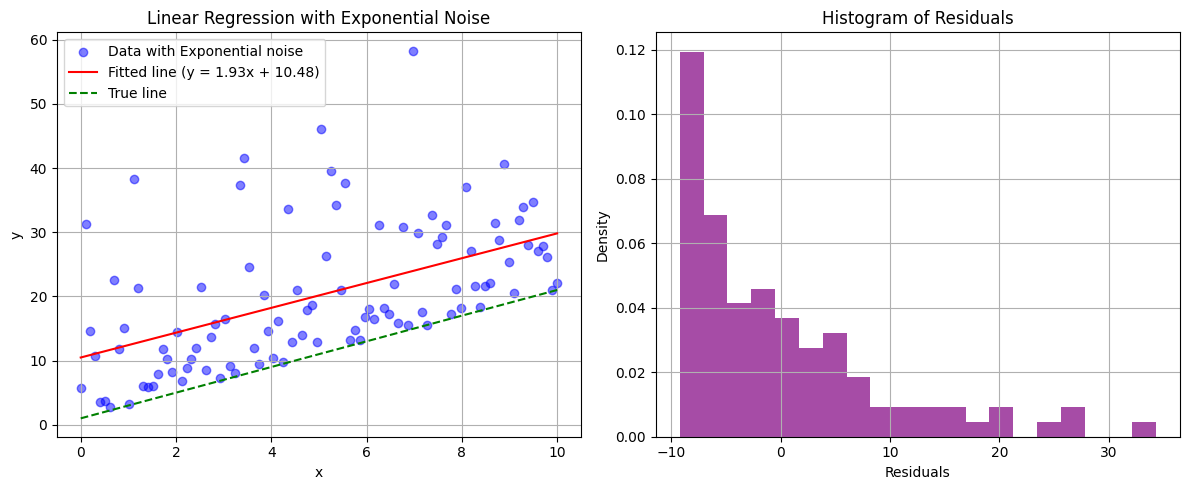

In [ ]:
np.random.seed(42)

n = 100  
x = np.linspace(0, 10, n).reshape(-1, 1)  
true_slope = 2  
true_intercept = 1  
lambda_param = 1/10  
epsilon = np.random.exponential(scale=1/lambda_param, size=n)  
y = true_slope * x.flatten() + true_intercept + epsilon 

# Fit linear regression model using OLS
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

residuals = y - y_pred

perform_shapiro_wilk_test(residuals)

plot_regression_results(x, y, y_pred, residuals, true_slope, true_intercept, noise_type='Exponential')

## Explanation of the Results

As observed in the first plot, **all data points lie above the true regression line** (green dashed line).  
This happens because the error term follows an **Exponential distribution**, which only takes **positive values**.  
Since $ x $ is positive, the added error term shifts all points **upward**, keeping them above the true line.

Secondly, most of the data points are **below the fitted regression line** (red solid line).  
This occurs due to the nature of the **Exponential distribution**, where higher values of $ x $ are associated with a **lower probability density**.  
As a result, **fewer points** appear at higher $x$ values, causing the regression line to be pulled slightly higher than expected.

The histogram of residuals (right plot) also reflects this **asymmetry**, showing a clear right-skewed distribution instead of a normal distribution.
This confirms that the assumption of normally distributed residuals in **OLS regression** is violated in this case.


## Importance of Symmetric Error Distributions

From our observations, we conclude that we should use **symmetric** distributions for error terms.  
One key advantage of the **normal distribution** is its **symmetry**, which helps maintain unbiased regression estimates.  

However, the normal distribution is **not the only symmetric distribution**.  
To explore this further, we now assume that the error term follows a **continuous uniform distribution**:

$$
\varepsilon_i \sim \text{Uniform}(a, b), \qquad \mathbb{E}(\varepsilon_i) = \frac{a + b}{2}, \qquad \text{Var}(\varepsilon_i) = \frac{(b - a)^2}{12}
$$

In the next section, we will visualize how this affects the regression model.


Shapiro-Wilk Test Results:
Test Statistic: 0.9437
P-value: 0.0003
Result: Reject the null hypothesis (Residuals are not normally distributed)


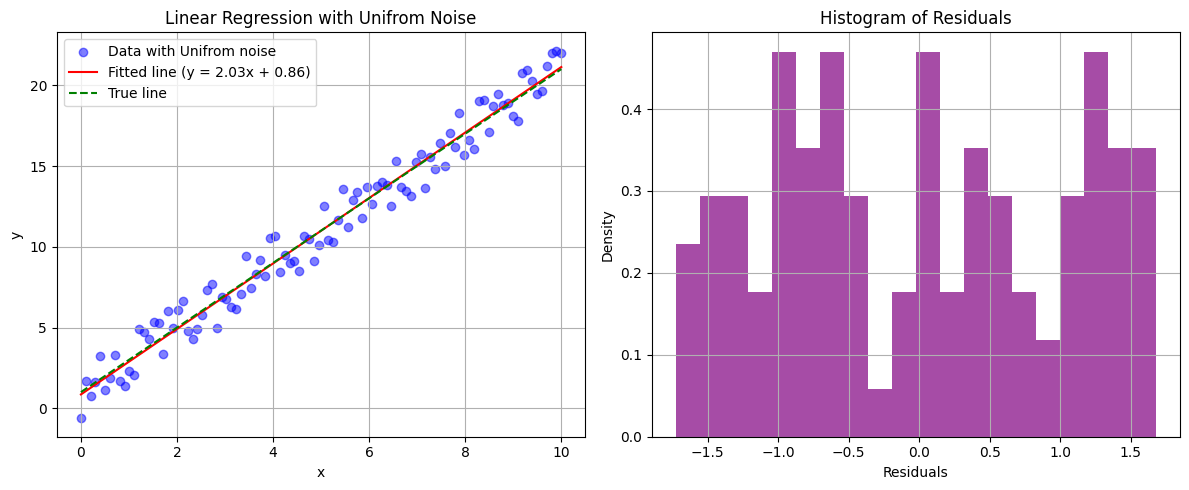

In [ ]:
n = 100  
x = np.linspace(0, 10, n).reshape(-1, 1)  
true_slope = 2 
true_intercept = 1 
a = sq(3)  # E(epsilon)=0 & var(epsilon)= 1/3 = 0.33
epsilon = np.random.uniform(low=-a, high=a, size=n)  # uniform noise
y = true_slope * x.flatten() + true_intercept + epsilon 

# Fit linear regression model using OLS
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

residuals = y - y_pred

perform_shapiro_wilk_test(residuals)

plot_regression_results(x, y, y_pred, residuals, true_slope, true_intercept, noise_type='Unifrom')

## Visual Inspection of the Regression Line

This plot appears to show a **flawless** regression line in terms of its appearance.  
Although the assumption of **normality** for $ \varepsilon_i $ is rejected, it seems that this regression line fits the data quite well.

In this example, the parameters $ a $ and $ b $ are chosen such that:

$$
\mathbb{E}(\varepsilon_i) = 0 \quad \text{and} \quad \text{Var}(\varepsilon_i) = 1.
$$

Now, let's investigate this scenario by using a **normal distribution** for the error terms, with the same **mean** and **variance** for the errors, and compare the results.


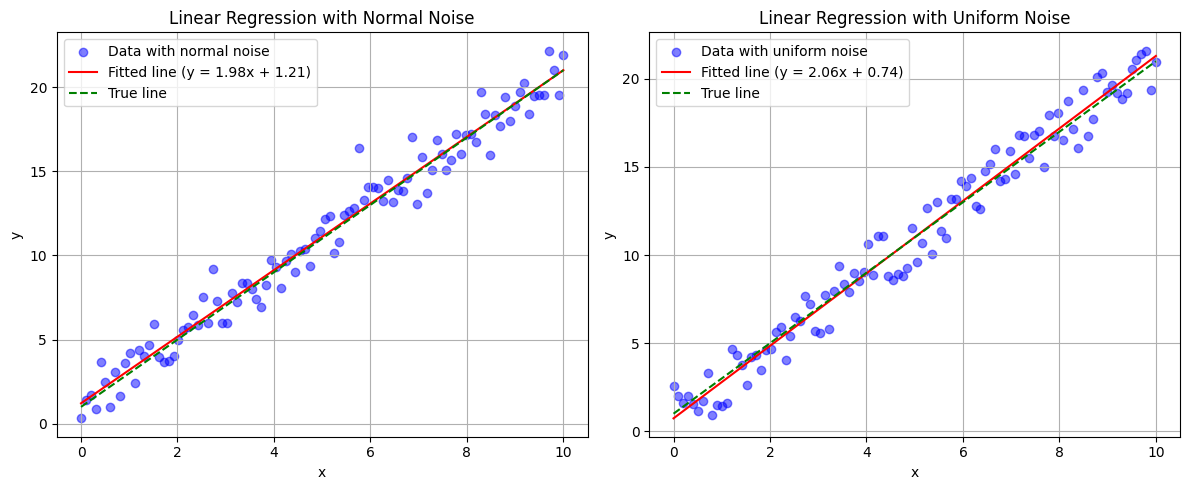

In [9]:
n = 100  
x = np.linspace(0, 10, n).reshape(-1, 1) 
true_slope = 2  
true_intercept = 1 

# Data with normal noise
epsilon_normal = np.random.normal(0, 1, n)  # normal noise with mean 0 and std 2
y_normal = true_slope * x.flatten() + true_intercept + epsilon_normal

# Data with uniform noise
a = sq(3)  # parameter for uniform distribution range [-a, a]
epsilon_uniform = np.random.uniform(low=-a, high=a, size=n)  # uniform noise
y_uniform = true_slope * x.flatten() + true_intercept + epsilon_uniform

# Fit linear regression models
model_normal = LinearRegression()
model_normal.fit(x, y_normal)
y_pred_normal = model_normal.predict(x)

model_uniform = LinearRegression()
model_uniform.fit(x, y_uniform)
y_pred_uniform = model_uniform.predict(x)

plot_linear_regression(x, y_normal, y_pred_normal, y_uniform, y_pred_uniform, true_slope, true_intercept, model_normal, model_uniform)

## Is the Normal Distribution the Only Reason for Statistical Tests?

It seems that the **Uniform distribution** for the errors, at least visually, appears to be a better fit than the **Normal distribution**.  
However, this doesn't align with the slope of the regression line, which remains unaffected.

So, is the **normality** assumption for errors only necessary for **statistical tests**?  
The answer is **no**. In fact, the main issue that arises in the plot stems from the **variance** of the distribution of $ \varepsilon_i $.

By changing the variance, we can see significant effects on the regression plot, which would impact the interpretation of the model, even if the error terms are symmetric and centered at zero.


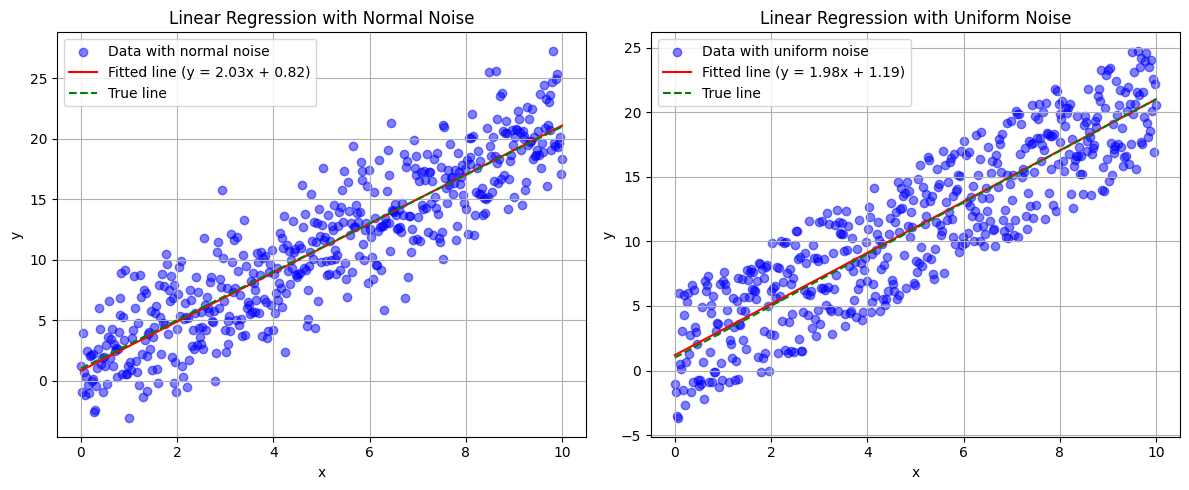

In [10]:
n = 500  
x = np.linspace(0, 10, n).reshape(-1, 1) 
true_slope = 2 
true_intercept = 1 

# Data with normal noise
epsilon_normal = np.random.normal(0, sq(25/3), n)  # normal noise with mean 0 and variance 25/3 = 0.833
y_normal = true_slope * x.flatten() + true_intercept + epsilon_normal

# Data with uniform noise
a = 5  # parameter for uniform distribution range [-a, a]
epsilon_uniform = np.random.uniform(low=-a, high=a, size=n)  # uniform noise
y_uniform = true_slope * x.flatten() + true_intercept + epsilon_uniform

# Fit linear regression models
model_normal = LinearRegression()
model_normal.fit(x, y_normal)
y_pred_normal = model_normal.predict(x)

model_uniform = LinearRegression()
model_uniform.fit(x, y_uniform)
y_pred_uniform = model_uniform.predict(x)

plot_linear_regression(x, y_normal, y_pred_normal, y_uniform, y_pred_uniform, true_slope, true_intercept, model_normal, model_uniform)

## Comparison of Variance Effects on Uniform and Normal Distributions

In the previous experiment, we increased the variance of the error terms $ \varepsilon_i $ to $ \frac{25}{3} = 0.833 $.

With a larger dataset, the **Uniform distribution** still appears to perform better than the **Normal distribution** for the errors. However, with closer inspection, a subtle difference is noticeable.

In the **Uniform distribution**, as the distance from the regression line increases, the number of data points does not significantly change.  
In contrast, for the **Normal distribution**, we observe data points farther from the line. As the distance from the regression line increases, the number of data points decreases. This is due to the property of the **Normal distribution**, where the probability mass decreases as we move further from the mean.


Shapiro-Wilk Test Results:
Test Statistic: 0.9885
P-value: 0.5476
Result: Fail to reject the null hypothesis (Residuals may be normally distributed)


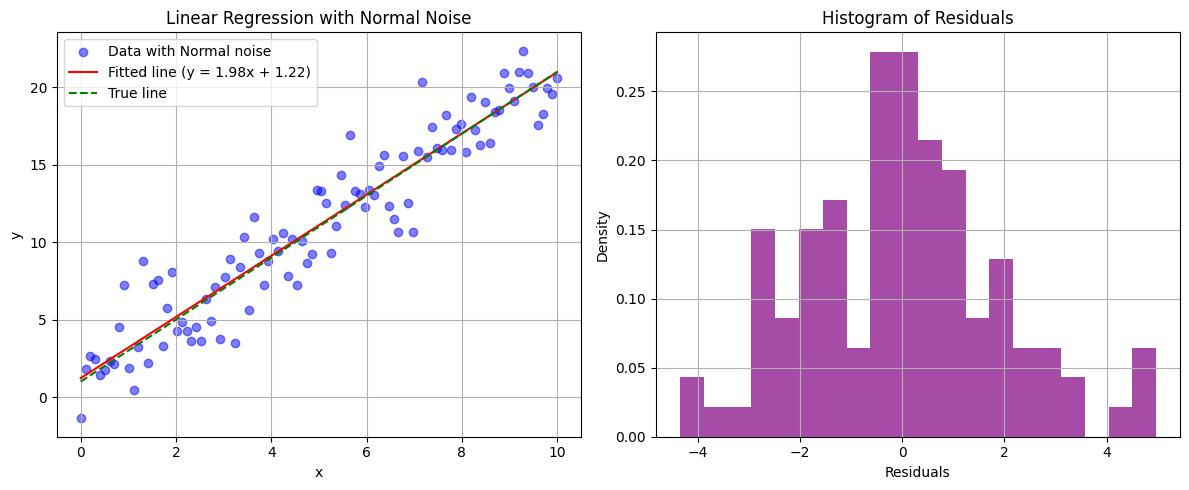

In [ ]:
n = 100  
x = np.linspace(0, 10, n).reshape(-1, 1)  
true_slope = 2  
true_intercept = 1  
epsilon = np.random.normal(0, 2, n)  # normal noise with mean 0 and std 2
y = true_slope * x.flatten() + true_intercept + epsilon  

# Fit linear regression model using OLS
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

residuals = y - y_pred

perform_shapiro_wilk_test(residuals)

plot_regression_results(x, y, y_pred, residuals, true_slope, true_intercept, noise_type='Normal')

## Summary and Conclusion

In this analysis, we explored the effect of different error distributions on linear regression.  
We observed that while the **Uniform distribution** seemed to provide a visually better fit for the regression line, the **Normal distribution** had a subtle advantage in terms of how data points were distributed around the regression line.

Specifically:
- The **Uniform distribution** produced data points that remained relatively consistent as the distance from the regression line increased.
- The **Normal distribution**, on the other hand, showed more data points closer to the regression line and fewer as the distance increased. This is a characteristic of the **Normal distribution** due to its decreasing probability mass as we move farther from the mean.

The advantage of the **Normal distribution** is that **more data points are closer to the fitted regression line**, meaning that most of our predictions are closer to the actual values. This ensures that the model is more accurate for the majority of predictions, while for the **Uniform distribution**, the data points are more spread out, leading to less accurate predictions overall.

In conclusion, while the **Uniform distribution** might appear better visually, the **Normal distribution**'s properties lead to a more meaningful and expected behavior in regression analysis, particularly when considering the variance and the distribution of the error terms.

---